In [28]:
%run save_embeds_2.py

Loading embeddings file from ../data/embeddings/crawl-300d-2M-subword.vec
2000000
2000000
Saving binary file to ../data/embeddings/crawl-300d-2M-subword.vec.wv
Saving vocabulary file to ../data/embeddings/crawl-300d-2M-subword.vec.vocab


## Preprocessing

### Load embeddings

In [11]:
import codecs
import numpy as np
from numpy import linalg as LA

def load_embeddings_from_np(filename):
    print('loading ...')
    with codecs.open(filename + '.vocab', 'r', 'utf-8') as f_embed:
        vocab = [line.strip() for line in f_embed]
        
    w2i = {w: i for i, w in enumerate(vocab)}
    wv = np.load(filename + '.wv.npy')

    return vocab, wv, w2i


def normalize(wv):
    
    # normalize vectors
    norms = np.apply_along_axis(LA.norm, 1, wv)
    wv = wv / norms[:, np.newaxis]
    return wv


def load_and_normalize(space, filename, vocab, wv, w2i):
    vocab_muse, wv_muse, w2i_muse = load_embeddings_from_np(filename)
    wv_muse = normalize(wv_muse)
    vocab[space] = vocab_muse 
    wv[space] = wv_muse
    w2i[space] = w2i_muse
    print('done')
    

def load_wo_normalize(space, filename, vocab, wv, w2i):
    vocab_muse, wv_muse, w2i_muse = load_embeddings_from_np(filename)
    vocab[space] = vocab_muse 
    wv[space] = wv_muse
    w2i[space] = w2i_muse
    print('done')
    

In [29]:
vocab = {}
wv = {}
w2i = {}

load_and_normalize('glove_1', '../data/embeddings/glove.twitter.27B.25d.txt', vocab, wv, w2i)
load_and_normalize('glove_2', '../data/embeddings/glove.twitter.27B.50d.txt', vocab, wv, w2i)
load_and_normalize('glove_3', '../data/embeddings/glove.twitter.27B.100d.txt', vocab, wv, w2i)
load_and_normalize('glove_4', '../data/embeddings/glove.twitter.27B.200d.txt', vocab, wv, w2i)
load_and_normalize('glove_5', '../data/embeddings/glove.6B.50d.txt', vocab, wv, w2i)
load_and_normalize('glove_6', '../data/embeddings/glove.6B.100d.txt', vocab, wv, w2i)
load_and_normalize('glove_7', '../data/embeddings/glove.6B.200d.txt', vocab, wv, w2i)
load_and_normalize('glove_8', '../data/embeddings/glove.6B.300d.txt', vocab, wv, w2i)
load_and_normalize('glove_9', '../data/embeddings/glove.42B.300d.txt', vocab, wv, w2i)
load_and_normalize('glove_10', '../data/embeddings/glove.840B.300d.txt', vocab, wv, w2i)
load_and_normalize('fasttext_1', '../data/embeddings/wiki-news-300d-1M.vec', vocab, wv, w2i)
load_and_normalize('fasttext_2', '../data/embeddings/wiki-news-300d-1M-subword.vec', vocab, wv, w2i)
load_and_normalize('fasttext_3', '../data/embeddings/crawl-300d-2M.vec', vocab, wv, w2i)
load_and_normalize('fasttext_4', '../data/embeddings/crawl-300d-2M-subword.vec', vocab, wv, w2i)
load_and_normalize('w2v', '../data/embeddings/orig_w2v', vocab, wv, w2i)

loading ...
done
loading ...
done
loading ...
done
loading ...
done
loading ...
done
loading ...
done
loading ...
done
loading ...
done
loading ...
done
loading ...
done
loading ...
done
loading ...
done
loading ...
done
loading ...
done
loading ...
done


In [30]:
from tqdm import tqdm

def topK(w, space, k=10):
    
    # extract the word vector for word w
    idx = w2i[space][w]
    vec = wv[space][idx, :]
    
    # compute similarity of w with all words in the vocabulary
    sim = wv[space].dot(vec)
    # sort similarities by descending order
    sort_sim = (sim.argsort())[::-1]

    # choose topK
    best = sort_sim[:(k+1)]

    return [vocab[space][i] for i in best if i!=idx]


def similarity(w1, w2, space):
    
    i1 = w2i[space][w1]
    i2 = w2i[space][w2]
    vec1 = wv[space][i1, :]
    vec2 = wv[space][i2, :]

    return np.inner(vec1,vec2)



### Restrict vocabulary

In [31]:
import string 


def has_punct(w):
    
    if any([c in string.punctuation for c in w]):
        return True
    return False

def has_digit(w):
    
    if any([c in '0123456789' for c in w]):
        return True
    return False

def limit_vocab(space, exclude = None):
    vocab_limited = []
    for w in tqdm(vocab[space][:50000]): 
        if w.lower() != w:
            continue
        if len(w) >= 20:
            continue
        if has_digit(w):
            continue
        if '_' in w:
            p = [has_punct(subw) for subw in w.split('_')]
            if not any(p):
                vocab_limited.append(w)
            continue
        if has_punct(w):
            continue
        vocab_limited.append(w)
    
    if exclude:
        vocab_limited = list(set(vocab_limited) - set(exclude))
    
    print("size of vocabulary:", len(vocab_limited))
    
    wv_limited = np.zeros((len(vocab_limited), 300))
    for i,w in enumerate(vocab_limited):
        wv_limited[i,:] = wv[space][w2i[space][w],:]
    
    w2i_limited = {w: i for i, w in enumerate(vocab_limited)}
    
    return vocab_limited, wv_limited, w2i_limited



In [34]:
import string 


def has_punct(w):
    
    if any([c in string.punctuation for c in w]):
        return True
    return False

def has_digit(w):
    
    if any([c in '0123456789' for c in w]):
        return True
    return False

def limit_vocab(space, exclude = None, vec_len):
    vocab_limited = []
    for w in tqdm(vocab[space][:50000]): 
        if w.lower() != w:
            continue
        if len(w) >= 20:
            continue
        if has_digit(w):
            continue
        if '_' in w:
            p = [has_punct(subw) for subw in w.split('_')]
            if not any(p):
                vocab_limited.append(w)
            continue
        if has_punct(w):
            continue
        vocab_limited.append(w)
    
    if exclude:
        vocab_limited = list(set(vocab_limited) - set(exclude))
    
    print("size of vocabulary:", len(vocab_limited))
    
    wv_limited = np.zeros((len(vocab_limited), vec_len))
    for i,w in enumerate(vocab_limited):
        wv_limited[i,:] = wv[space][w2i[space][w],:]
    
    w2i_limited = {w: i for i, w in enumerate(vocab_limited)}
    
    return vocab_limited, wv_limited, w2i_limited




In [41]:
# create the reduced vocabularies and embeddings before and after, without gendered specific words

import json
with codecs.open('../data/lists/gender_specific_full.json') as f:
    gender_specific = json.load(f)
with codecs.open('../data/lists/definitional_pairs.json') as f:
    definitional_pairs = json.load(f)
with codecs.open('../data/lists/equalize_pairs.json') as f:
    equalize_pairs = json.load(f)

exclude_words = []
for pair in definitional_pairs + equalize_pairs:
    exclude_words.append(pair[0])
    exclude_words.append(pair[1])

exclude_words = list(set(exclude_words).union(set(gender_specific)))

# create spaces of limited vocabulary
vocab['limit_glove_1'], wv['limit_glove_1'], w2i['limit_glove_1'] = limit_vocab('glove_1', exclude = exclude_words, vec_len=25)
vocab['limit_glove_2'], wv['limit_glove_2'], w2i['limit_glove_2'] = limit_vocab('glove_2', exclude = exclude_words, vec_len=50)
vocab['limit_glove_3'], wv['limit_glove_3'], w2i['limit_glove_3'] = limit_vocab('glove_3', exclude = exclude_words, vec_len=100)
vocab['limit_glove_4'], wv['limit_glove_4'], w2i['limit_glove_4'] = limit_vocab('glove_4', exclude = exclude_words, vec_len=200)
vocab['limit_glove_5'], wv['limit_glove_5'], w2i['limit_glove_5'] = limit_vocab('glove_5', exclude = exclude_words, vec_len=50)
vocab['limit_glove_6'], wv['limit_glove_6'], w2i['limit_glove_6'] = limit_vocab('glove_6', exclude = exclude_words, vec_len=100)
vocab['limit_glove_7'], wv['limit_glove_7'], w2i['limit_glove_7'] = limit_vocab('glove_7', exclude = exclude_words, vec_len=200)
vocab['limit_glove_8'], wv['limit_glove_8'], w2i['limit_glove_8'] = limit_vocab('glove_8', exclude = exclude_words, vec_len=300)
vocab['limit_glove_9'], wv['limit_glove_9'], w2i['limit_glove_9'] = limit_vocab('glove_9', exclude = exclude_words, vec_len=300)
vocab['limit_glove_10'], wv['limit_glove_10'], w2i['limit_glove_10'] = limit_vocab('glove_10', exclude = exclude_words, vec_len=300)

vocab['limit_fasttext_1'], wv['limit_fasttext_1'], w2i['limit_fasttext_1'] = limit_vocab('fasttext_1', exclude = exclude_words, vec_len=300)
vocab['limit_fasttext_2'], wv['limit_fasttext_2'], w2i['limit_fasttext_2'] = limit_vocab('fasttext_2', exclude = exclude_words, vec_len=300)
vocab['limit_fasttext_3'], wv['limit_fasttext_3'], w2i['limit_fasttext_3'] = limit_vocab('fasttext_3', exclude = exclude_words, vec_len=300)
vocab['limit_fasttext_4'], wv['limit_fasttext_4'], w2i['limit_fasttext_4'] = limit_vocab('fasttext_4', exclude = exclude_words, vec_len=300)

vocab['limit_w2v'], wv['limit_w2v'], w2i['limit_w2v'] = limit_vocab('w2v', exclude = exclude_words, vec_len=300)


100%|██████████| 50000/50000 [00:00<00:00, 444855.68it/s]


size of vocabulary: 49288
size of vocabulary: 49288


100%|██████████| 50000/50000 [00:00<00:00, 441419.26it/s]

size of vocabulary: 49288



  0%|          | 0/50000 [00:00<?, ?it/s]

size of vocabulary: 49288


100%|██████████| 50000/50000 [00:00<00:00, 431659.31it/s]


size of vocabulary: 45530
size of vocabulary: 45530


100%|██████████| 50000/50000 [00:00<00:00, 431272.27it/s]

size of vocabulary: 45530



  0%|          | 0/50000 [00:00<?, ?it/s]

size of vocabulary: 45530


100%|██████████| 50000/50000 [00:00<00:00, 681608.31it/s]


size of vocabulary: 42716
size of vocabulary: 23097


100%|██████████| 50000/50000 [00:00<00:00, 575448.22it/s]


size of vocabulary: 26800
size of vocabulary: 26800


100%|██████████| 50000/50000 [00:00<00:00, 589102.53it/s]


size of vocabulary: 27174
size of vocabulary: 27231


100%|██████████| 50000/50000 [00:00<00:00, 598386.16it/s]


size of vocabulary: 26189


### Compute bias-by-projection

In [42]:
# create a dictionary of the bias, before and after

def compute_bias_by_projection(space_to_tag, full_space):
    males = wv[space_to_tag].dot(wv[full_space][w2i[full_space]['he'],:])
    females = wv[space_to_tag].dot(wv[full_space][w2i[full_space]['she'],:])
    d = {}
    for w,m,f in zip(vocab[space_to_tag], males, females):
        d[w] = m-f
    return d

# compute bias-by-projection before and after debiasing
gender_bias_glove_1 = compute_bias_by_projection('limit_glove_1', 'glove_1')
gender_bias_glove_2 = compute_bias_by_projection('limit_glove_2', 'glove_2')
gender_bias_glove_3 = compute_bias_by_projection('limit_glove_3', 'glove_3')
gender_bias_glove_4 = compute_bias_by_projection('limit_glove_4', 'glove_4')
gender_bias_glove_5 = compute_bias_by_projection('limit_glove_5', 'glove_5')
gender_bias_glove_6 = compute_bias_by_projection('limit_glove_6', 'glove_6')
gender_bias_glove_7 = compute_bias_by_projection('limit_glove_7', 'glove_7')
gender_bias_glove_8 = compute_bias_by_projection('limit_glove_8', 'glove_8')
gender_bias_glove_9 = compute_bias_by_projection('limit_glove_9', 'glove_9')
gender_bias_glove_10 = compute_bias_by_projection('limit_glove_10', 'glove_10')

gender_bias_fasttext_1 = compute_bias_by_projection('limit_fasttext_1', 'fasttext_1')
gender_bias_fasttext_2 = compute_bias_by_projection('limit_fasttext_2', 'fasttext_2')
gender_bias_fasttext_3 = compute_bias_by_projection('limit_fasttext_3', 'fasttext_3')
gender_bias_fasttext_4 = compute_bias_by_projection('limit_fasttext_4', 'fasttext_4')

gender_bias_w2v = compute_bias_by_projection('limit_w2v', 'w2v')


In [44]:
# calculate the avg bias of the vocabulary (abs) before and after debiasing

def report_bias(gender_bias):
    bias = 0.0
    for k in gender_bias:
        bias += np.abs(gender_bias[k])
    print(bias/len(gender_bias))

#### GloVe Twitter

In [45]:
report_bias(gender_bias_glove_1)
report_bias(gender_bias_glove_2)
report_bias(gender_bias_glove_3)
report_bias(gender_bias_glove_4)

0.09540471479449965
0.08798050874134192
0.07545063847129732
0.06236838290796072


#### GloVe Wiki Gigaword

In [46]:
report_bias(gender_bias_glove_5)
report_bias(gender_bias_glove_6)
report_bias(gender_bias_glove_7)
report_bias(gender_bias_glove_8)

0.06009518969994563
0.04789622113818426
0.04561136886650126
0.04346563770051508


#### GloVe Common Crawl

In [47]:
report_bias(gender_bias_glove_9)
report_bias(gender_bias_glove_10)

0.030484643981032403
0.03909768263521343


#### word2vec

In [48]:
report_bias(gender_bias_w2v)

0.0460773100635275


#### fastText Wiki News

In [49]:
report_bias(gender_bias_fasttext_1)
report_bias(gender_bias_fasttext_2)

0.026961478262307038
0.02273574827560815


#### fastText Common Crawl

In [50]:
report_bias(gender_bias_fasttext_3)
report_bias(gender_bias_fasttext_4)

0.03212379572532572
0.02273328362188915


## Experiments

### Correlation between bias-by-projection and bias-by-neighbors

In [61]:
# get tuples of biases and counts of masculine/feminine NN for each word (for bias-by-neighbors)

def bias_by_neighbors(gender_bias, space, neighbours_num = 100):
    
    tuples = []
    for w in tqdm(vocab[space]):
        
        top = topK(w, space, k=neighbours_num+5)[:neighbours_num]

        m = 0
        f = 0    
        for t in top:
            if gender_bias[t] > 0:
                m+=1
            else:
                f+=1

        tuples.append((w, gender_bias[w], m, f))

    return tuples

In [53]:
tuples_glove_1 = bias_by_neighbors(gender_bias_glove_1, 'limit_glove_1')   
tuples_glove_2 = bias_by_neighbors(gender_bias_glove_2, 'limit_glove_2')  
tuples_glove_3 = bias_by_neighbors(gender_bias_glove_3, 'limit_glove_3')  
tuples_glove_4 = bias_by_neighbors(gender_bias_glove_4, 'limit_glove_4')  
tuples_glove_5 = bias_by_neighbors(gender_bias_glove_5, 'limit_glove_5')  
tuples_glove_6 = bias_by_neighbors(gender_bias_glove_6, 'limit_glove_6')  
tuples_glove_7 = bias_by_neighbors(gender_bias_glove_7, 'limit_glove_7')
tuples_glove_8 = bias_by_neighbors(gender_bias_glove_8, 'limit_glove_8')  
tuples_glove_9 = bias_by_neighbors(gender_bias_glove_9, 'limit_glove_9')  
tuples_glove_10 = bias_by_neighbors(gender_bias_glove_10, 'limit_glove_10')  

tuples_w2v = bias_by_neighbors(gender_bias_w2v, 'limit_w2v')  

tuples_fasttext_1 = bias_by_neighbors(gender_bias_fasttext_1, 'limit_fasttext_1')  
tuples_fasttext_2 = bias_by_neighbors(gender_bias_fasttext_2, 'limit_fasttext_2')  
tuples_fasttext_3 = bias_by_neighbors(gender_bias_fasttext_3, 'limit_fasttext_3')  
tuples_fasttext_4 = bias_by_neighbors(gender_bias_fasttext_4, 'limit_fasttext_4')  


100%|██████████| 27231/27231 [01:38<00:00, 275.27it/s]


In [54]:
# compute correlation between bias-by-projection and bias-by-neighbors

import scipy.stats

def pearson(a,b):
   
    return scipy.stats.pearsonr(a,b)

def compute_corr(tuples, i1, i2):
    
    a = []
    b = []
    for t in tuples:
        a.append(t[i1])
        b.append(t[i2])
    assert(len(a)==len(b))    
    print(pearson(a,b))


#### GloVe Twitter

In [62]:
compute_corr(tuples_glove_1, 1, 2)
compute_corr(tuples_glove_2, 1, 2)
compute_corr(tuples_glove_3, 1, 2)
compute_corr(tuples_glove_4, 1, 2)

(0.8724100178362321, 0.0)
(0.8586076557038413, 0.0)
(0.8497446347007468, 0.0)
(0.8347333503930401, 0.0)


#### GloVe Wiki Gigaword

In [63]:
compute_corr(tuples_glove_5, 1, 2)
compute_corr(tuples_glove_6, 1, 2)
compute_corr(tuples_glove_7, 1, 2)
compute_corr(tuples_glove_8, 1, 2)

(0.8442397459468596, 0.0)
(0.8119382402476751, 0.0)
(0.7730547290513069, 0.0)
(0.7444402487664554, 0.0)


#### GloVe Common Crawl

In [64]:
compute_corr(tuples_glove_9, 1, 2)
compute_corr(tuples_glove_10, 1, 2)

(0.7697368579080862, 0.0)
(0.7702136554401371, 0.0)


#### word2vec

In [58]:
compute_corr(tuples_w2v, 1, 2)

(0.7406908013529686, 0.0)


#### fastText Wiki News

In [59]:
compute_corr(tuples_fasttext_1, 1, 2)
compute_corr(tuples_fasttext_2, 1, 2)

(0.6290830393062714, 0.0)
(0.6249758074699922, 0.0)


#### fastText Common Crawl

In [60]:
compute_corr(tuples_fasttext_3, 1, 2)
compute_corr(tuples_fasttext_4, 1, 2)

(0.6336795662445177, 0.0)
(0.6200156403337626, 0.0)


### Clustering Experiment - Visualize clusters of most biased words

In [27]:
# Auxiliary finctions

import matplotlib as mpl
import matplotlib.pyplot as plt
import mpld3
from cycler import cycler
%matplotlib inline
mpld3.enable_notebook()
mpl.rc("savefig", dpi=200)
mpl.rcParams['figure.figsize'] = (8,8)
mpl.rcParams['axes.prop_cycle'] = cycler(color='rc')

from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs

from sklearn.manifold import TSNE

def visualize(vectors, words, labels, ax, title, random_state, num_clusters = 2):
    
    # perform TSNE
    
    X_embedded = TSNE(n_components=2, random_state=random_state).fit_transform(vectors)
    if num_clusters == 2:
        for x,l in zip(X_embedded, labels):
            if l:
                ax.scatter(x[0], x[1], marker = '.', c = 'c')
            else:
                ax.scatter(x[0], x[1], marker = 'x', c = 'darkviolet')
    else:
        ax.scatter(X_embedded[:,0], X_embedded[:,1], c = labels)                
    
    ax.text(.01, .9, title ,transform=ax.transAxes, fontsize=18)

    
#def extract_vectors(words, space1 = 'limit_bef', space2 = 'limit_aft'):
    
    #size = len(words)/2
    
    #X_bef = [wv[space1][w2i[space1][x],:] for x in words]
    #X_aft = [wv[space2][w2i[space2][x],:] for x in words]

    #return X_bef, X_aft

def extract_vectors(words, space1 = 'limit_bef'):
    
    size = len(words)/2
    
    X_bef = [wv[space1][w2i[space1][x],:] for x in words]

    return X_bef


#def cluster_and_visualize(words, X_bef, X_aft, random_state, y_true, num=2):

    #fig, axs = plt.subplots(1, 2, figsize=(15, 3))
    
    #y_pred_bef = KMeans(n_clusters=num, random_state=random_state).fit_predict(X_bef)
    #visualize(X_bef, words, y_pred_bef, axs[0], 'Original', random_state)
    #correct = [1 if item1 == item2 else 0 for (item1,item2) in zip(y_true, y_pred_bef) ]
    #print('precision bef', sum(correct)/float(len(correct)))
    
    #y_pred_aft = KMeans(n_clusters=num, random_state=random_state).fit_predict(X_aft)
    #visualize(X_aft, words, y_pred_aft, axs[1], 'Debiased', random_state)
    #correct = [1 if item1 == item2 else 0 for (item1,item2) in zip(y_true, y_pred_aft) ]
    #print('precision aft', sum(correct)/float(len(correct)))
    #fig.show()
    
def cluster_and_visualize(words, X_bef, random_state, y_true, num=2):

    fig, axs = plt.subplots(1, 2, figsize=(15, 3))
    
    y_pred_bef = KMeans(n_clusters=num, random_state=random_state).fit_predict(X_bef)
    visualize(X_bef, words, y_pred_bef, axs[0], 'Original', random_state)
    correct = [1 if item1 == item2 else 0 for (item1,item2) in zip(y_true, y_pred_bef) ]
    print('precision bef', sum(correct)/float(len(correct)))
    
    fig.show()
    


precision bef 0.999


<ipython-input-27-16ee0f455f6e>:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


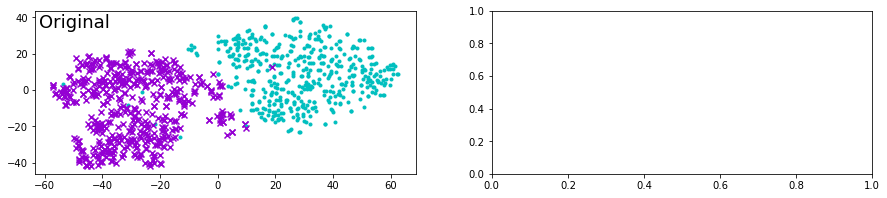

In [28]:
# Cluster most biased words before and after debiasing
import operator

random_state = 1

size = 500
sorted_g = sorted(gender_bias_bef.items(), key=operator.itemgetter(1))
female = [item[0] for item in sorted_g[:size]]
male = [item[0] for item in sorted_g[-size:]]

#X_bef, X_aft = extract_vectors(male + female)
X_bef = extract_vectors(male + female)
y_true = [1]*size + [0]*size
#cluster_and_visualize(male + female, X_bef, X_aft, random_state, y_true)
cluster_and_visualize(male + female, X_bef, random_state, y_true)


### Professions experiment

In [29]:

def extract_professions():
    professions = []
    with codecs.open('../data/lists/professions.json', 'r', 'utf-8') as f:
        professions_data = json.load(f)
    for item in professions_data:
        professions.append(item[0].strip())
    return professions


professions = extract_professions()


In [39]:
import scipy.stats

def get_tuples_prof(space, words, gender_bias_dict):

    tuples = []
    for w in words:
        if w not in gender_bias_dict:
            continue
            
        top = topK(w, space, k=105)[:100]
            
        m = 0
        f = 0  
        for t in top:          
            if gender_bias_dict[t] > 0:
                m+=1
            else:
                f+=1
                
        #tuples.append((w, gender_bias_bef[w], gender_bias_aft[w], m, f))
        tuples.append((w, gender_bias_bef[w], m, f))
        
    return tuples


tuples_bef_prof = get_tuples_prof('limit_bef', professions, gender_bias_bef)
#tuples_aft_prof = get_tuples_prof('limit_aft', professions, gender_bias_bef)

compute_corr(tuples_bef_prof, 1, 2)
#compute_corr(tuples_aft_prof, 1, 3)



(0.7472828994751871, 6.10492306812532e-54)


In [31]:
import matplotlib.pyplot as plt

<ipython-input-32-d02e90f9575b>:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


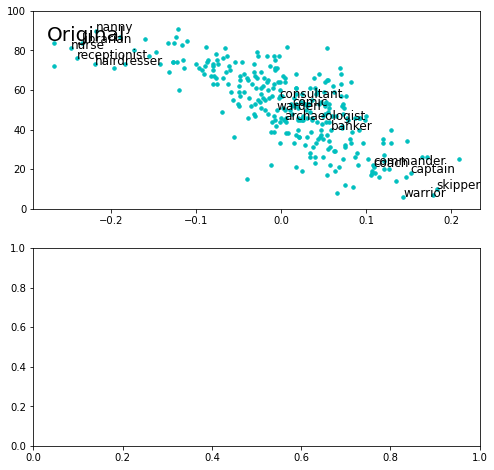

In [32]:
# Show plots

#def show_plots(tuples_bef_prof, tuples_aft_prof):
    
    #fig, axs = plt.subplots(2,1, figsize=(8,8))
    
    #for i,(tuples, title) in enumerate(zip([tuples_bef_prof, tuples_aft_prof], ['Original', 'Debiased'])):
        #X = []
        #Y = []
        #for t in tuples:
            #X.append(t[1])
            #Y.append(t[3])

        #axs[i].scatter(X,Y, color = 'c', s=12)
        #axs[i].set_ylim(0,100)
        
        #for t in tuples:
            #if t[0] in ['nanny', 'librarian', 'hairdresser', 'receptionist', 'nurse',\
                       #'consultant', 'warden', 'archaeologist', 'banker', 'comic',\
                        #'warrior', 'skipper', 'captain', 'commander', 'coach']:
                #axs[i].annotate(t[0], xy=(t[1], t[3]), xytext=(t[1], t[3]), textcoords="data", fontsize=12) 
        #axs[i].text(.03, .85, title, transform=axs[i].transAxes, fontsize=20)
    
    
    #fig.show()
    

#show_plots(tuples_bef_prof, tuples_aft_prof)


def show_plots(tuples_bef_prof):
    
    fig, axs = plt.subplots(2,1, figsize=(8,8))
    
    for i,(tuples, title) in enumerate(zip([tuples_bef_prof], ['Original', 'Debiased'])):
        X = []
        Y = []
        for t in tuples:
            X.append(t[1])
            Y.append(t[3])

        axs[i].scatter(X,Y, color = 'c', s=12)
        axs[i].set_ylim(0,100)
        
        for t in tuples:
            if t[0] in ['nanny', 'librarian', 'hairdresser', 'receptionist', 'nurse',\
                       'consultant', 'warden', 'archaeologist', 'banker', 'comic',\
                        'warrior', 'skipper', 'captain', 'commander', 'coach']:
                axs[i].annotate(t[0], xy=(t[1], t[3]), xytext=(t[1], t[3]), textcoords="data", fontsize=12) 
        axs[i].text(.03, .85, title, transform=axs[i].transAxes, fontsize=20)
    
    
    fig.show()
    

show_plots(tuples_bef_prof)


### Classification experiment

In [33]:
# take 5000 most biased words, split each polarity randomly to train (1/5) and test (4/5), and predict

from sklearn import svm
from random import shuffle
import random
random.seed(10)



def train_and_predict(space_train, space_test):
    
    X_train = [wv[space_train][w2i[space_train][w],:] for w in males[:size_train]+females[:size_train]]
    Y_train = [1]*size_train + [0]*size_train
    X_test = [wv[space_test][w2i[space_test][w],:] for w in males[size_train:]+females[size_train:]]
    Y_test = [1]*size_test + [0]*size_test

    clf = svm.SVC()
    clf.fit(X_train, Y_train)

    print('train with', space_train)
    print('test with', space_test)

    preds = clf.predict(X_test)

    accuracy = [1 if y==z else 0 for y,z in zip(preds, Y_test)]
    print('accuracy:', float(sum(accuracy))/len(accuracy))

    
# extract nost biased words

size_train = 500
size_test = 2000
size = size_train + size_test
sorted_g = sorted(gender_bias_bef.items(), key=operator.itemgetter(1))
females = [item[0] for item in sorted_g[:size]]
males = [item[0] for item in sorted_g[-size:]]
for f in females:
    assert(gender_bias_bef[f] < 0)
for m in males:
    assert(gender_bias_bef[m] > 0)
shuffle(females)
shuffle(males)

# classification before debiasing

train_and_predict('bef', 'bef')

# classification after debiasing

#train_and_predict('aft', 'aft')


train with bef
test with bef
accuracy: 0.99975
